In [2]:
import pandas as pd

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.optimize

In [4]:
url = 'https://www.cl.cam.ac.uk/teaching/2122/DataSci/data/iris.csv'
iris = pd.read_csv(url)

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


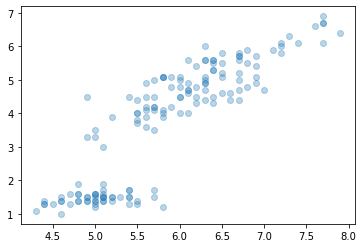

In [11]:
SL, PL = iris['Sepal.Length'], iris['Petal.Length']
fig, ax = plt.subplots()
ax.scatter(SL, PL, alpha =.3)
plt.show()

In [12]:
np.unique(iris['Species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
species = iris['Species']
species_groups = np.unique(species)
species_onehot = [np.where(species==k,1,0) for k in species_groups]

In [15]:
features_vectors = np.column_stack((species_onehot+[SL * i for i in species_onehot]))
features_vectors

array([[1. , 0. , 0. , 5.1, 0. , 0. ],
       [1. , 0. , 0. , 4.9, 0. , 0. ],
       [1. , 0. , 0. , 4.7, 0. , 0. ],
       [1. , 0. , 0. , 4.6, 0. , 0. ],
       [1. , 0. , 0. , 5. , 0. , 0. ],
       [1. , 0. , 0. , 5.4, 0. , 0. ],
       [1. , 0. , 0. , 4.6, 0. , 0. ],
       [1. , 0. , 0. , 5. , 0. , 0. ],
       [1. , 0. , 0. , 4.4, 0. , 0. ],
       [1. , 0. , 0. , 4.9, 0. , 0. ],
       [1. , 0. , 0. , 5.4, 0. , 0. ],
       [1. , 0. , 0. , 4.8, 0. , 0. ],
       [1. , 0. , 0. , 4.8, 0. , 0. ],
       [1. , 0. , 0. , 4.3, 0. , 0. ],
       [1. , 0. , 0. , 5.8, 0. , 0. ],
       [1. , 0. , 0. , 5.7, 0. , 0. ],
       [1. , 0. , 0. , 5.4, 0. , 0. ],
       [1. , 0. , 0. , 5.1, 0. , 0. ],
       [1. , 0. , 0. , 5.7, 0. , 0. ],
       [1. , 0. , 0. , 5.1, 0. , 0. ],
       [1. , 0. , 0. , 5.4, 0. , 0. ],
       [1. , 0. , 0. , 5.1, 0. , 0. ],
       [1. , 0. , 0. , 4.6, 0. , 0. ],
       [1. , 0. , 0. , 5.1, 0. , 0. ],
       [1. , 0. , 0. , 4.8, 0. , 0. ],
       [1. , 0. , 0. , 5.

In [16]:
import sklearn

In [17]:
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(features_vectors, PL)

LinearRegression(fit_intercept=False)

In [18]:
alpha1, alpha2, alpha3, beta1, beta2, beta3 = model.coef_
print(alpha1, alpha2, alpha3, beta1, beta2, beta3)

0.8030518051312383 0.1851155095287561 0.6104679802955668 0.13163168095660435 0.6864697591764224 0.7500807558749899


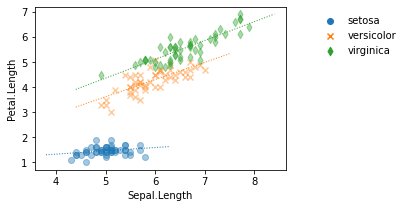

In [19]:
pred = (iris.groupby('Species')['Sepal.Length']
        .apply(lambda x: pandas.DataFrame({'Sepal.Length': np.linspace(min(x)-.5,max(x)+.5,20)}))
        .reset_index())

# Make predictions
new_onehot = [np.where(pred['Species']==k,1,0) for k in species_groups]
new_SL = pred['Sepal.Length']
new_X = np.column_stack(new_onehot + [s*new_SL for s in new_onehot])
pred['Petal.Length'] = model.predict(new_X)

fig,ax = plt.subplots(figsize=(4.5,3))
for k,m in zip(species_groups, ['o','x','d']):
    df = iris.loc[iris['Species'] == k]
    ax.scatter(df['Sepal.Length'], df['Petal.Length'], marker=m, label=k, alpha=0.4)
    df = pred.loc[pred['Species'] == k]
    ax.plot(df['Sepal.Length'], df['Petal.Length'], label=k, zorder=-1, linewidth=1, linestyle='dotted')

ax.set_ylabel('Petal.Length')
ax.set_xlabel('Sepal.Length')

h,l = ax.get_legend_handles_labels()
leg = plt.legend(h[3:], l[3:], loc=2, bbox_to_anchor=(1.1,1), frameon=False)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

In [20]:
features = [[1,1,0,0,0,0,0,0],[0,0,1,1,0,0,0,0],[0,0,0,0,1,1,0,0],[0,0,0,0,0,0,1,1], # e1, e2, e3, e4
            [1,0,1,0,1,0,0,0],[0,1,0,1,0,0,1,0],[0,0,0,0,0,1,0,1]] # e5, e6, e7
y = [13,15,14,12,18,10,16,8]
np.linalg.matrix_rank(features) # e1 + e2 + e3 + e4 = e5 + e6 + e7, hence linearly dependent

6

In [21]:
model.fit(np.column_stack(features), y)
coefs = model.coef_
coefs

array([4.14285714, 3.14285714, 8.14285714, 6.14285714, 9.85714286,
       9.85714286, 1.85714286])

In [22]:

test_data = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],
             [0,0,0,1],[0,0,1,0],[1,1,0,0]]
model.predict(np.column_stack(test_data))

array([ 6.,  5., 18., 16.])

In [24]:
features = [[1,1,0,0,0,0,0,0],[0,0,1,1,0,0,0,0],[0,0,0,0,1,1,0,0],[0,0,0,0,0,0,1,1], # e1, e2, e3, e4
            [1,0,1,0,1,0,0,0],[0,1,0,1,0,0,1,0],[0,0,0,0,0,1,0,1]] # e5, e6, e7
y = [13,15,14,12,18,10,16,8]
np.linalg.matrix_rank(features) # e1 + e2 + e3 + e4 = e5 + e6 + e7, hence linearly dependent
test_data = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],
             [0,0,0,1],[0,0,1,0],[1,1,0,0]]
model.predict(np.column_stack(test_data))

# turn it into independent feature vectors by removing one feature vector and add a constant vector
new_features = [[0,0,1,1,0,0,0,0],[0,0,0,0,1,1,0,0],[0,0,0,0,0,0,1,1], # e2, e3, e4
            [1,0,1,0,1,0,0,0],[0,1,0,1,0,0,1,0],[0,0,0,0,0,1,0,1]]
ones = np.ones(8)
model.fit(np.column_stack(ones+newfeatures),y)
coefs = model.coef
coefs

NameError: name 'newfeatures' is not defined

In [25]:
features = [[1,1,0,0,0,0,0,0],[0,0,1,1,0,0,0,0],[0,0,0,0,1,1,0,0],[0,0,0,0,0,0,1,1], # e1, e2, e3, e4
            [1,0,1,0,1,0,0,0],[0,1,0,1,0,0,1,0],[0,0,0,0,0,1,0,1]] # e5, e6, e7
y = [13,15,14,12,18,10,16,8]
np.linalg.matrix_rank(features) # e1 + e2 + e3 + e4 = e5 + e6 + e7, hence linearly dependent
test_data = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],
             [0,0,0,1],[0,0,1,0],[1,1,0,0]]
model.predict(np.column_stack(test_data))

array([ 6.,  5., 18., 16.])